<a href="https://colab.research.google.com/github/nina-mesyngier/ds200-projects/blob/main/DS200_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datascience import *
from datascience.predicates import are
path_data = '../../../../data/'
import numpy as np
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen
import re
def read_url(url):
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

# Plotting the classics

In this example, we will explore statistics for two classic novels: *The Adventures of Huckleberry Finn* by Mark Twain, and *Little Women* by Louisa May Alcott. The text of any book can be read by a computer at great speed. Books published before 1923 are currently in the *public domain*, meaning that everyone has the right to copy or use the text in any way. [Project Gutenberg](http://www.gutenberg.org/) is a website that publishes public domain books online. Using Python, we can load the text of these books directly from the web.

This example is meant to illustrate some of the broad themes of this text. Don't worry if the details of the program don't yet make sense. Instead, focus on interpreting the images generated below. Later sections of the text will describe most of the features of the Python programming language used below.

First, we read the text of both books into lists of chapters, called `huck_finn_chapters` and `little_women_chapters`. In Python, a name cannot contain any spaces, and so we will often use an underscore `_` to stand in for a space. The `=` in the lines below give a name on the left to the result of some computation described on the right. A *uniform resource locator* or *URL* is an address on the Internet for some content; in this case, the text of a book. The `#` symbol starts a comment, which is ignored by the computer but helpful for people reading the code.

In [ ]:
# Read two books, fast!

huck_finn_url = 'https://www.gutenberg.org/cache/epub/76/pg76.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_remove_end = huck_finn_text.split('*** END OF THE PROJECT GUTENBERG EBOOK ADVENTURES OF HUCKLEBERRY FINN ***')[:2]
huck_finn_chapters = huck_finn_remove_end[0].split('CHAPTER ')[44:]

little_women_url = 'https://www.gutenberg.org/cache/epub/514/pg514.txt'
little_women_text = read_url(little_women_url)
little_women_remove_end = little_women_text.split('*** END OF THE PROJECT GUTENBERG EBOOK LITTLE WOMEN ***')[:2]
little_women_chapters = little_women_remove_end[0].split('CHAPTER ')[48:]

# load in and read Alice in Wonderland
alice_in_wonderland_url = 'https://www.gutenberg.org/cache/epub/11/pg11.txt'
alice_in_wonderland_text = read_url(alice_in_wonderland_url)
alice_in_wonderland_remove_end = alice_in_wonderland_text.split("*** END OF THE PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***")[:2]
alice_in_wonderland_chapters = alice_in_wonderland_remove_end[0].split('CHAPTER')[13:]

While a computer cannot understand the text of a book, it can provide us with some insight into the structure of the text. The name `huck_finn_chapters` is currently bound to a list of all the chapters in the book. We can place them into a table to see how each chapter begins.

In [ ]:
# Display the chapters of Huckleberry Finn in a table.

Table().with_column('Chapters', huck_finn_chapters)

Chapters
I. You don’t know about me without you have read a book ...
II. We went tiptoeing along a path amongst the trees bac ...
"III. Well, I got a good going-over in the morning from o ..."
"IV. Well, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. Well, pretty soon the old man was up and around agai ..."
VII. “Git up! What you ’bout?” I opened my eyes and look ...
VIII. The sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. After breakfast I wanted to talk about the dead man a ...


Each chapter begins with a chapter number in Roman numerals, followed by the first sentence of the chapter. Project Gutenberg has printed the first word of each chapter in upper case.

Text(0.5, 1.08, 'Cumulative Number of Times Each Name Appears')

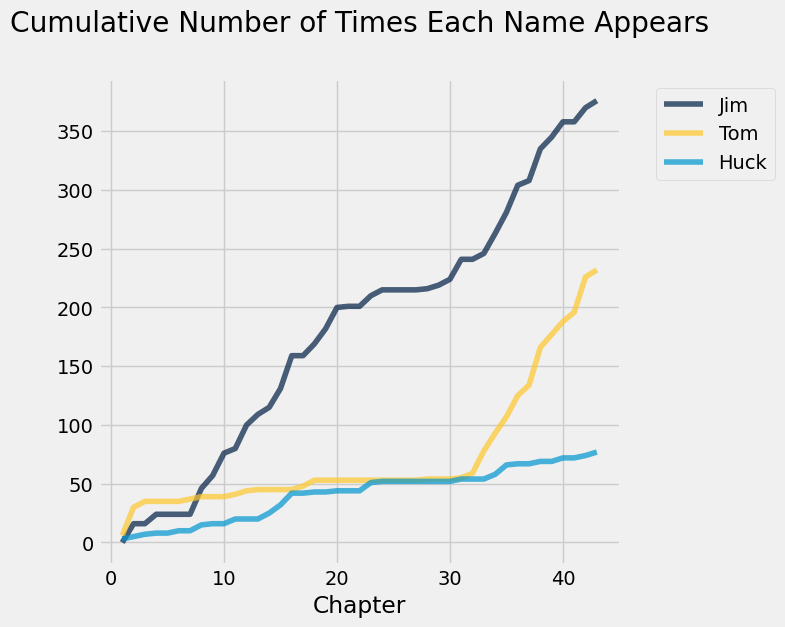

In [ ]:
# Get the cumulative counts the names Jim, Tom, and Huck appear in each chapter.

counts = Table().with_columns([
        'Jim', np.cumsum(np.char.count(huck_finn_chapters, 'Jim')),
        'Tom', np.cumsum(np.char.count(huck_finn_chapters, 'Tom')),
        'Huck', np.cumsum(np.char.count(huck_finn_chapters, 'Huck'))
    ])

# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

cum_counts = counts.with_column('Chapter', np.arange(1, 44, 1))
cum_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08)

In [ ]:
# The chapters of Little Women, in a table

Table().with_column('Chapters', little_women_chapters)

Chapters
ONE PLAYING PILGRIMS “Christmas won’t be Christmas witho ...
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
THREE THE LAURENCE BOY “Jo! Jo! Where are you?” cried Me ...
"FOUR BURDENS “Oh, dear, how hard it does seem to take up ..."
FIVE BEING NEIGHBORLY “What in the world are you going t ...
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
SEVEN AMY’S VALLEY OF HUMILIATION “That boy is a perfect ...
"EIGHT JO MEETS APOLLYON “Girls, where are you going?” as ..."
NINE MEG GOES TO VANITY FAIR “I do think it was the most ...
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


Text(0.5, 1.08, 'Cumulative Number of Times Each Name Appears')

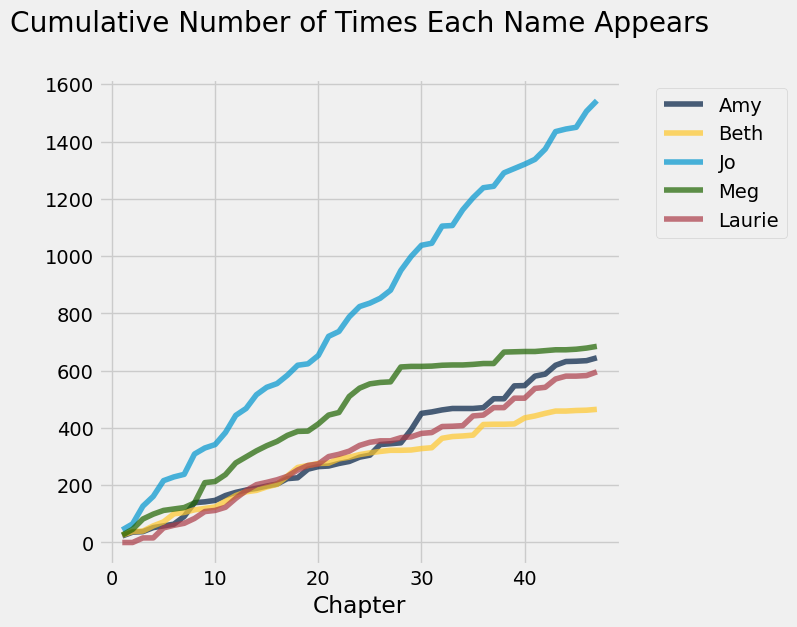

In [ ]:
# Get the cumulative counts of the names in the chapters of Little Women

counts = Table().with_columns([
        'Amy', np.cumsum(np.char.count(little_women_chapters, 'Amy')),
        'Beth', np.cumsum(np.char.count(little_women_chapters, 'Beth')),
        'Jo', np.cumsum(np.char.count(little_women_chapters, 'Jo')),
        'Meg', np.cumsum(np.char.count(little_women_chapters, 'Meg')),
        'Laurie', np.cumsum(np.char.count(little_women_chapters, 'Laurie')),

    ])

# Plot the cumulative counts.

cum_counts = counts.with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08)

In [ ]:
# Table with the chapters from Alice in Wonderland
Table().with_column('Chapters', alice_in_wonderland_chapters)

Chapters
I. Down the Rabbit-Hole Alice was beginning to get very ...
II. The Pool of Tears “Curiouser and curiouser!” cried ...
III. A Caucus-Race and a Long Tale They were indeed a q ...
IV. The Rabbit Sends in a Little Bill It was the White ...
V. Advice from a Caterpillar The Caterpillar and Alice ...
VI. Pig and Pepper For a minute or two she stood lookin ...
VII. A Mad Tea-Party There was a table set out under a ...
VIII. The Queen’s Croquet-Ground A large rose-tree stoo ...
IX. The Mock Turtle’s Story “You can’t think how glad I ...
"X. The Lobster Quadrille The Mock Turtle sighed deeply, ..."


Text(0.5, 1.08, 'Cumulative Number of Times Each Name Appears')

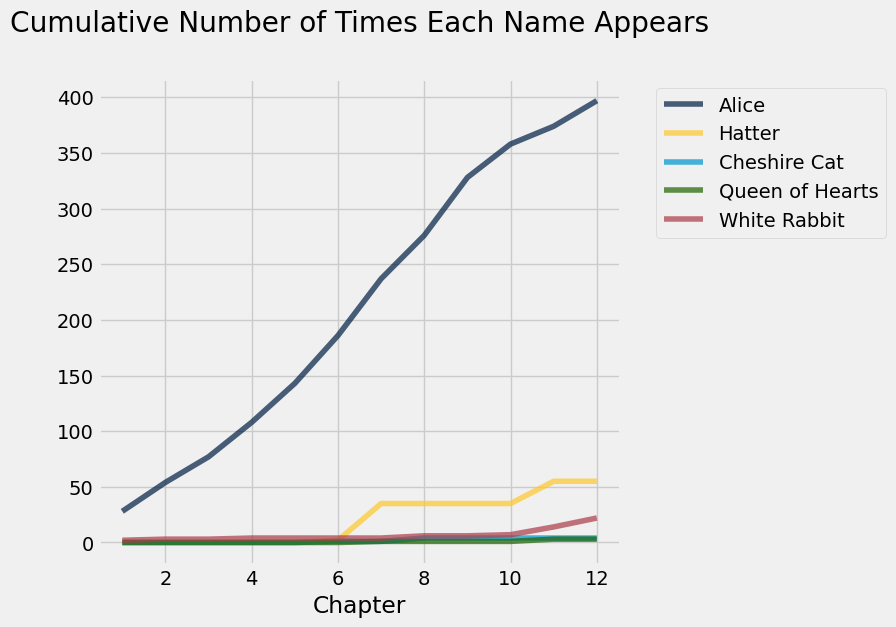

In [ ]:
# Get the cumulative counts of the names in the chapters of Alice in Wonderland

counts = Table().with_columns([
        'Alice', np.cumsum(np.char.count(alice_in_wonderland_chapters, 'Alice')),
        'Hatter', np.cumsum(np.char.count(alice_in_wonderland_chapters, 'Hatter')),
        'Cheshire Cat', np.cumsum(np.char.count(alice_in_wonderland_chapters, 'Cheshire Cat')),
        'Queen of Hearts', np.cumsum(np.char.count(alice_in_wonderland_chapters, 'Queen of Hearts')),
        'White Rabbit', np.cumsum(np.char.count(alice_in_wonderland_chapters, 'White Rabbit')),

    ])

# Plot the cumulative counts.

cum_counts = counts.with_column('Chapter', np.arange(1, 13, 1))
cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08)

In [ ]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_huck_finn = Table().with_columns([
        'Huck Finn Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')
    ])
chars_periods_little_women = Table().with_columns([
        'Little Women Chapter Length', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])

# count number of characters "length" in a chapter and number of periods in the chapter
chars_periods_alice_in_wonderland = Table().with_columns([
        'Alice in Wonderland Chapter Length', [len(s) for s in alice_in_wonderland_chapters],
        'Number of Periods', np.char.count(alice_in_wonderland_chapters, '.')
    ])

In [ ]:
chars_periods_huck_finn

Huck Finn Chapter Length,Number of Periods
7018,66
11972,117
8522,72
6794,84
8147,91
14524,125
13204,127
22189,249
8069,71
7036,70


In [ ]:
chars_periods_little_women

Little Women Chapter Length,Number of Periods
21757,189
22148,188
20558,231
25524,195
23396,255
14621,140
14430,131
22476,214
33765,337
18333,185


In [ ]:
chars_periods_alice_in_wonderland

Alice in Wonderland Chapter Length,Number of Periods
11335,44
10893,46
9143,63
13835,57
11771,74
13735,111
12569,122
13592,86
12532,114
11291,92


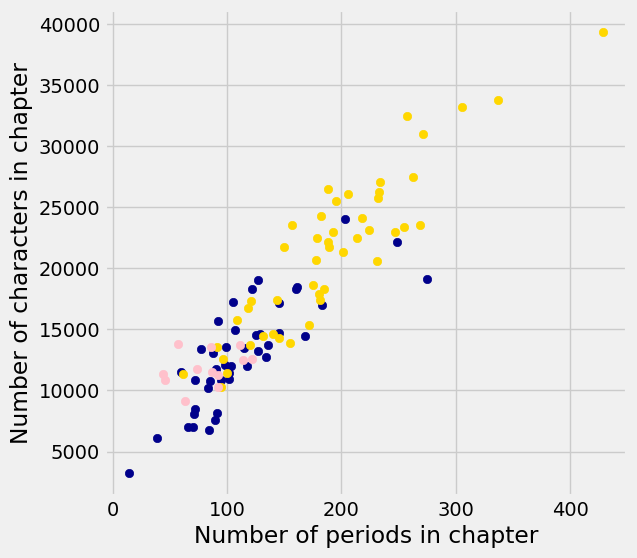

In [ ]:
plots.figure(figsize=(6, 6))
plots.scatter(chars_periods_huck_finn.column(1),
              chars_periods_huck_finn.column(0),
              color='darkblue')
plots.scatter(chars_periods_little_women.column(1),
              chars_periods_little_women.column(0),
              color='gold')
plots.scatter(chars_periods_alice_in_wonderland.column(1),
              chars_periods_alice_in_wonderland.column(0),
              color='pink')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');